___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[5].shape

# numpy array olduğundan shape methodunu çalıştırabiliyorum.32*32'lik renkli resimler var elimizde.

(32, 32, 3)

In [ ]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

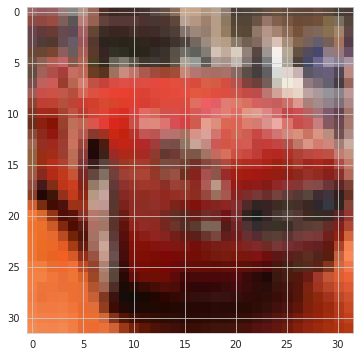

In [ ]:
plt.imshow(X_train[5])
plt.show()

In [ ]:
y_train[5]

array([1], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
np.unique(y_train, return_counts=True)

# train setinde de test setinde de bütün class'lar eşit dağılmış datamız dengeli.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
y_train[0]

array([6], dtype=uint8)

In [7]:
classes[y_train[0][0]]

'frog'

In [ ]:
classes[int(y_train[0])]  # classes[6]

'frog'

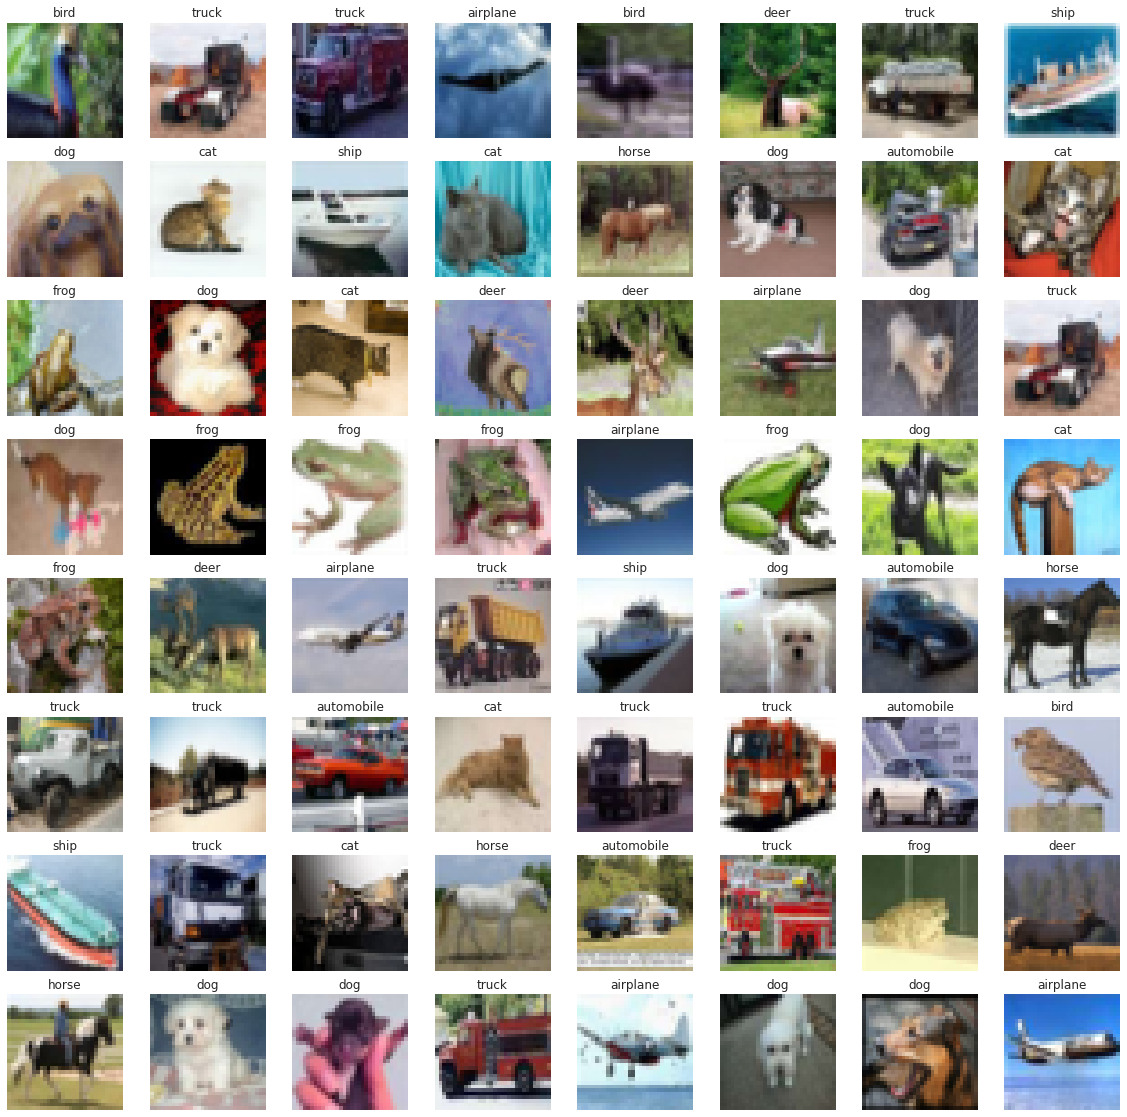

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [ ]:
X_train[5].min()

0

In [ ]:
X_train[5].max()

252

In [ ]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[5].min()

0.0

In [ ]:
X_train[5].max()

0.9882353

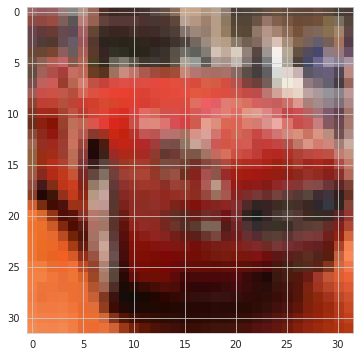

In [ ]:
plt.imshow(X_train[5])

In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 18s 5ms/step - loss: 1.4159 - accuracy: 0.4913 - val_loss: 1.1658 - val_accuracy: 0.5836
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0488 - accuracy: 0.6296 - val_loss: 0.9902 - val_accuracy: 0.6529
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9085 - accuracy: 0.6802 - val_loss: 0.9520 - val_accuracy: 0.6665
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8100 - accuracy: 0.7173 - val_loss: 0.9424 - val_accuracy: 0.6744
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7247 - accuracy: 0.7432 - val_loss: 0.8918 - val_accuracy: 0.6897
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6502 - accuracy: 0.7705 - val_loss: 0.9363 - val_accuracy: 0.6912
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5770 - accuracy: 0.7973 - val_loss: 0.9629 - val_accuracy

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,1.416,0.491,1.166,0.584
1,1.049,0.630,0.990,0.653
2,0.908,0.680,0.952,0.666
3,0.810,0.717,0.942,0.674
4,0.725,0.743,0.892,0.690
5,0.650,0.771,0.936,0.691
6,0.577,0.797,0.963,0.682


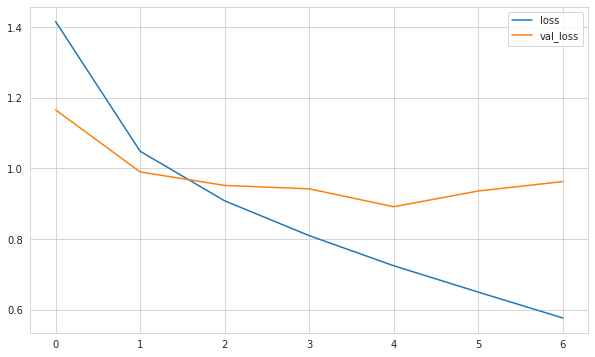

In [ ]:
summary[["loss", "val_loss"]].plot();

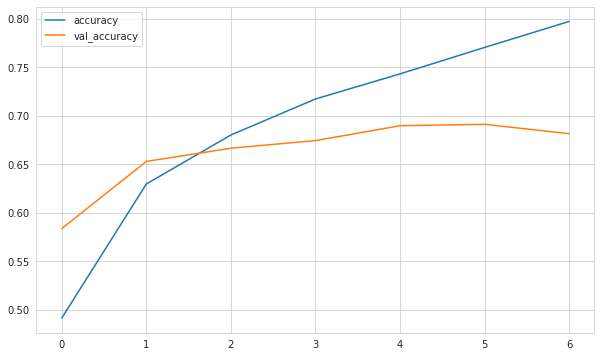

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8918 - accuracy: 0.6897


[0.8917750120162964, 0.6897000074386597]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8917750120162964
Test accuracy: 0.6897000074386597


In [ ]:
pred_prob = model.predict(X_test)
pred_prob

array([[4.8891781e-04, 3.8320941e-03, 1.1068305e-03, ..., 1.8163255e-04,
        1.4237042e-02, 5.3942919e-04],
       [1.1011756e-04, 1.0077024e-02, 5.2392625e-07, ..., 1.9915793e-09,
        9.8975897e-01, 5.1210256e-05],
       [1.4139710e-01, 2.6639831e-01, 1.2494155e-02, ..., 1.5400884e-03,
        4.6354106e-01, 8.3432786e-02],
       ...,
       [1.0288758e-03, 1.7510383e-05, 5.7488769e-02, ..., 6.1697256e-02,
        3.6088636e-04, 3.2239092e-05],
       [2.6820816e-02, 3.3978513e-01, 3.2434158e-02, ..., 3.7567599e-03,
        2.5032277e-03, 5.5839703e-03],
       [7.1658624e-06, 7.1797796e-05, 2.8563236e-04, ..., 9.6698761e-01,
        2.1791846e-05, 2.5314979e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([5, 8, 8, ..., 5, 4, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1000
           1       0.75      0.84      0.79      1000
           2       0.63      0.52      0.57      1000
           3       0.49      0.48      0.49      1000
           4       0.66      0.61      0.64      1000
           5       0.53      0.70      0.60      1000
           6       0.74      0.78      0.76      1000
           7       0.84      0.65      0.73      1000
           8       0.79      0.82      0.81      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[728  37  61  20  11   6  13   6  76  42]
 [ 16 843   5   9   3   7  10   3  34  70]
 [ 62  13 520  82 100 112  60  21  19  11]
 [ 21  23  48 483  45 273  71  14  15   7]
 [ 26   8  64  86 614  70  61  47  16   8]
 [ 13   7  33 133  41 702  26  19  15  11]
 [  9  16  49  68  28  39 776   5   4   6]
 [ 20   5  29  62  78 111   7 650   9  29]
 [ 60  49  10  16   6   8   6   1 824  20]
 [ 35 122   4  23   5   9  13   5  27 757]]


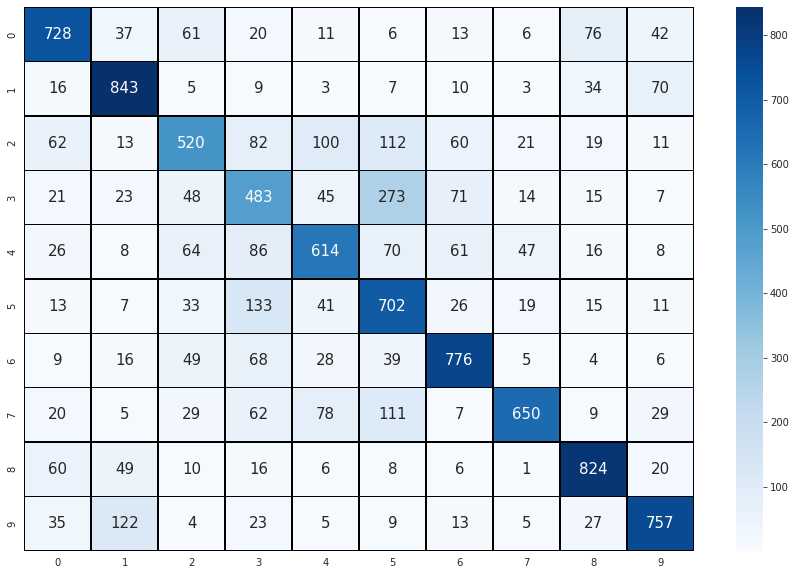

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [10]:
# resimlerin kötü kalitede olması da modelin hatalı tahminler yapmasına neden oldu.modelimin başarısı kötü ve overfittinge 
# gidebiliyor : 

# Modelling-2

In [ ]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
# Conv2D'den sonra illa pooling layer gelecek diye bir zorunluluk yoktur.

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.4))
    

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4342 - accuracy: 0.4796 - val_loss: 1.0588 - val_accuracy: 0.6303
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0399 - accuracy: 0.6319 - val_loss: 0.9672 - val_accuracy: 0.6621
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8958 - accuracy: 0.6838 - val_loss: 0.8249 - val_accuracy: 0.7117
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8121 - accuracy: 0.7157 - val_loss: 0.7714 - val_accuracy: 0.7298
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7496 - accuracy: 0.7361 - val_loss: 0.7597 - val_accuracy: 0.7349
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7034 - accuracy: 0.7537 - val_loss: 0.7334 - val_accuracy: 0.7462
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6657 - accuracy: 0.7635 - val_loss: 0.7238 - val_accu

In [ ]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.434,0.480,1.059,0.630
1,1.040,0.632,0.967,0.662
2,0.896,0.684,0.825,0.712
3,0.812,0.716,0.771,0.730
4,0.750,0.736,0.760,0.735
5,0.703,0.754,0.733,0.746
6,0.666,0.763,0.724,0.750
7,0.629,0.777,0.712,0.756
8,0.601,0.788,0.747,0.746
9,0.576,0.797,0.688,0.764


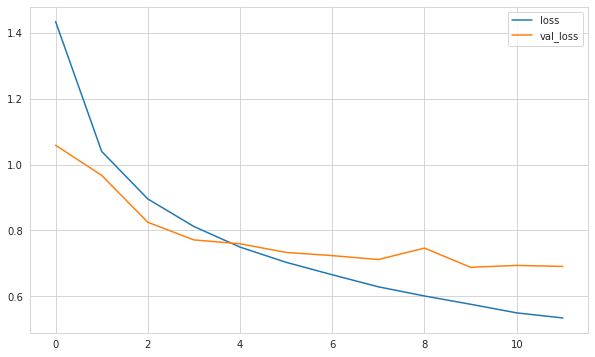

In [ ]:
summary[["loss", "val_loss"]].plot();

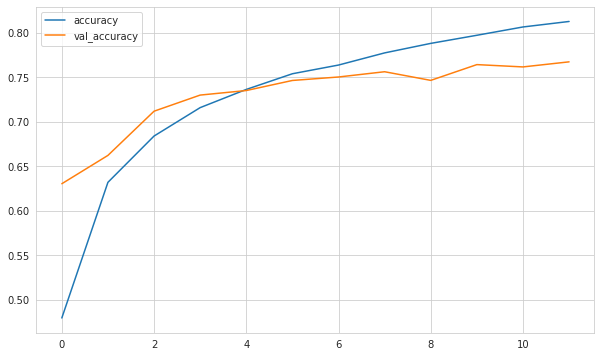

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.7640


[0.6882674098014832, 0.7639999985694885]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6882674098014832
Test accuracy: 0.7639999985694885


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1000
           1       0.83      0.90      0.86      1000
           2       0.75      0.58      0.65      1000
           3       0.64      0.49      0.55      1000
           4       0.67      0.80      0.73      1000
           5       0.62      0.74      0.67      1000
           6       0.80      0.84      0.82      1000
           7       0.82      0.82      0.82      1000
           8       0.87      0.86      0.86      1000
           9       0.83      0.85      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000



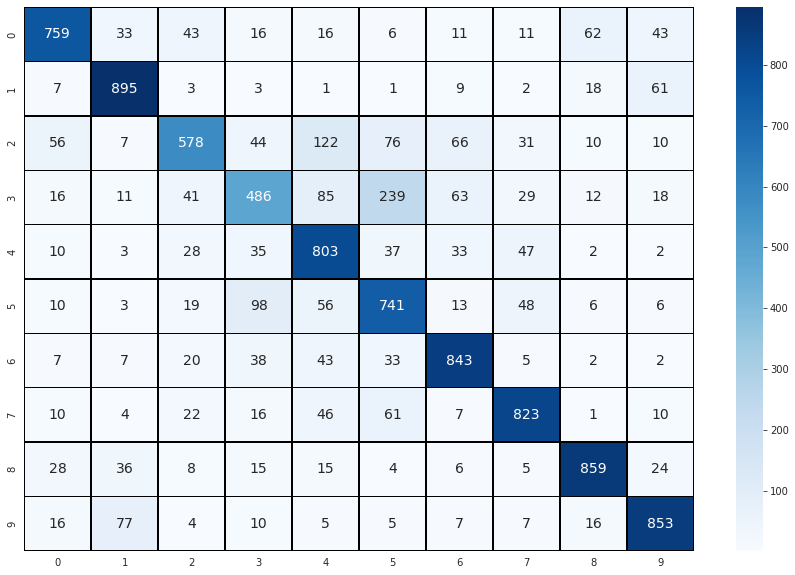

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [1]:
from tensorflow.keras.layers import BatchNormalization

# BatchNormalization bir regularization tekniğidir ANN yapılarında da kullanılabilir.Ama özellikle CNN mimarilerinde 
# daha iyi performans gösterdiği gözlemlenmiş.

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 18s 10ms/step - loss: 1.9312 - accuracy: 0.3094 - val_loss: 1.8178 - val_accuracy: 0.3375
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4269 - accuracy: 0.4868 - val_loss: 1.2518 - val_accuracy: 0.5650
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2235 - accuracy: 0.5781 - val_loss: 1.1090 - val_accuracy: 0.6201
Epoch 4/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0982 - accuracy: 0.6258 - val_loss: 0.8871 - val_accuracy: 0.6899
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0006 - accuracy: 0.6637 - val_loss: 0.9605 - val_accuracy: 0.6734
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9432 - accuracy: 0.6902 - val_loss: 0.7539 - val_accuracy: 0.7382
Epoch 7/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8807 - accuracy: 0.7136 - val_loss: 0.7392 - v

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.637,0.794,0.594,0.810
16,0.628,0.800,0.539,0.823
17,0.619,0.803,0.488,0.839
18,0.599,0.808,0.491,0.840
19,0.586,0.812,0.540,0.825


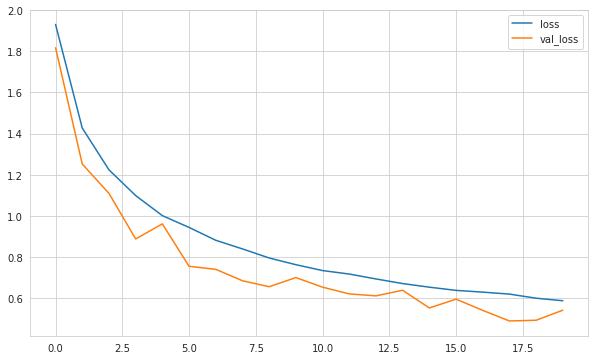

In [ ]:
summary[["loss", "val_loss"]].plot();

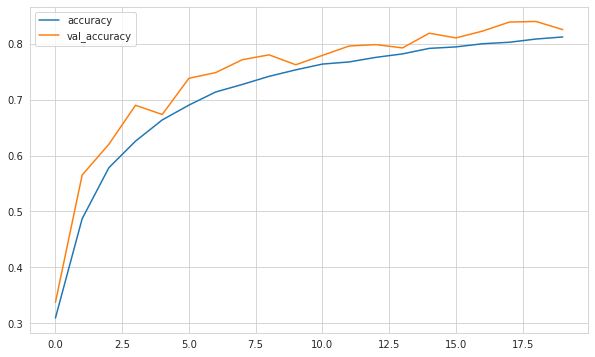

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.4878 - accuracy: 0.8387


[0.4877772331237793, 0.838699996471405]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4877772331237793
Test accuracy: 0.838699996471405


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 1, ..., 5, 1, 7])

In [ ]:
classes

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.90      0.94      0.92      1000
           2       0.83      0.72      0.77      1000
           3       0.74      0.67      0.70      1000
           4       0.81      0.85      0.83      1000
           5       0.73      0.80      0.76      1000
           6       0.83      0.91      0.87      1000
           7       0.91      0.87      0.89      1000
           8       0.89      0.90      0.89      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



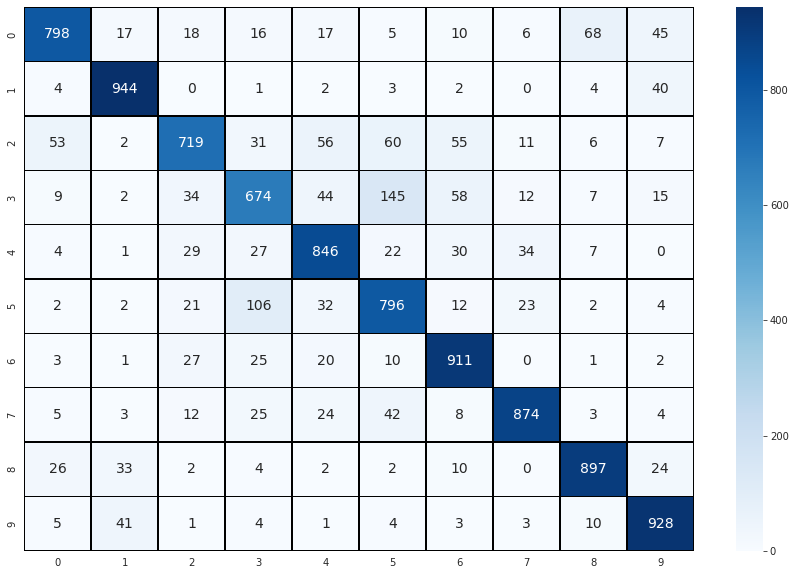

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [ ]:
my_image = X_test[44]

In [ ]:
my_image.shape

(32, 32, 3)

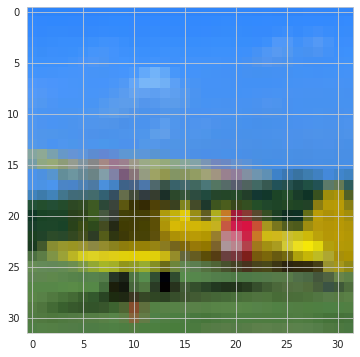

In [ ]:
plt.imshow(my_image)

In [ ]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [ ]:
image_prediction

array([[9.9657565e-01, 4.0117820e-04, 6.2162161e-04, 6.7935463e-05,
        1.7425881e-04, 2.7721346e-05, 2.1557435e-05, 1.0257196e-04,
        1.1007431e-03, 9.0680114e-04]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([0])

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

array([0])

In [ ]:
classes[int(result)]

'airplane'

In [ ]:
model.save("cnn-1.h5")

## Load the Saved Model and Get Predictions

In [ ]:
model = tf.keras.models.load_model('cnn-1.h5')

In [ ]:
X_test[15].shape

(32, 32, 3)

In [ ]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [ ]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [ ]:
np.argmax(pred)

8

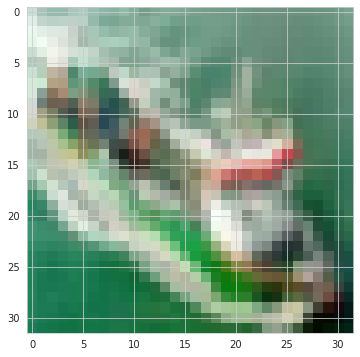

In [ ]:
plt.imshow(X_test[15])

In [ ]:
classes[8]

'ship'